In [243]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%pylab inline
import nltk
import re
import string
from textblob import TextBlob
from better_profanity import profanity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, MWETokenizer, wordpunct_tokenize
from nltk.stem.porter import PorterStemmer





Populating the interactive namespace from numpy and matplotlib


In [244]:
#read in data

df= pd.read_csv('reddit_covid_vaccine_myths.csv')

In [245]:
df.head()

,post_id,post_title,post_score,post_timestamp,post_upvote_ratio,post_selftext,comment_id,comment_body,comment_timestamp,comment_ups,comment_downs
0,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspiracy theories, and myths about the COVID-19 vaccine that continue to circulate online. \n\nHere are [common myths](https://www.wiserxcard.com/debunking-9-popular-covid-19-vaccine-myths-and-conspiracy-t...",h4le9is,"Impressive, if you just say the word ""debunked"" or ""conspiracy theory"" you don't really need any evidence to support your claim. You can also completely ignore any evidence, regardless how obvious or pervasive, contrary to your claims. Must be ni...",2021-07-09 14:24:06,8,0
1,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspiracy theories, and myths about the COVID-19 vaccine that continue to circulate online. \n\nHere are [common myths](https://www.wiserxcard.com/debunking-9-popular-covid-19-vaccine-myths-and-conspiracy-t...",h4lgsqm,Here is another common myth:\n\n1. The COVID-19 Vaccine is safe and effective\n\n[Top health expert says vaccinated people are spreading delta variant](https://www.newsbreakapp.com/n/0aqU8cRU?pd=09vyOnBD&lang=en_US&s=i0)\n\n[VAERS Covid Vaccine D...,2021-07-09 14:44:05,4,0
2,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspiracy theories, and myths about the COVID-19 vaccine that continue to circulate online. \n\nHere are [common myths](https://www.wiserxcard.com/debunking-9-popular-covid-19-vaccine-myths-and-conspiracy-t...",h4lgqh0,"If you roll out a Novell vaccine during the peak of flu season and cases decline naturally due to seasonality as they did in 2020 without a vaccine, how would we know they work?\n\nTiming isn't a coincidence. Very few people don't get respiratory...",2021-07-09 14:43:35,1,0
3,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspiracy theories, and myths about the COVID-19 vaccine that continue to circulate online. \n\nHere are [common myths](https://www.wiserxcard.com/debunking-9-popular-covid-19-vaccine-myths-and-conspiracy-t...",h5axwli,An experiment with a fuck ton of money riding on its success I might add...,2021-07-15 18:18:06,3,0
4,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspiracy theories, and myths about the COVID-19 vaccine that continue to circulate online. \n\nHere are [common myths](https://www.wiserxcard.com/debunking-9-popular-covid-19-vaccine-myths-and-conspiracy-t...",h550f3m,Agreed. Let’s see how it is in the fall.,2021-07-14 10:17:02,1,0


In [50]:
df.shape

(2817, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   post_id            2817 non-null   object 
 1   post_title         2817 non-null   object 
 2   post_score         2817 non-null   int64  
 3   post_timestamp     2817 non-null   object 
 4   post_upvote_ratio  2817 non-null   float64
 5   post_selftext      2817 non-null   object 
 6   comment_id         2817 non-null   object 
 7   comment_body       2817 non-null   object 
 8   comment_timestamp  2817 non-null   object 
 9   comment_ups        2817 non-null   int64  
 10  comment_downs      2817 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 242.2+ KB


In [246]:
#change to datetime format

df['post_timestamp'] = pd.to_datetime(df['post_timestamp'])

df['comment_timestamp'] = pd.to_datetime(df['comment_timestamp'])


In [7]:
df.head()


,post_id,post_title,post_score,post_timestamp,post_upvote_ratio,post_selftext,comment_id,comment_body,comment_timestamp,comment_ups,comment_downs
0,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspira...",h4le9is,"Impressive, if you just say the word ""debunked...",2021-07-09 14:24:06,8,0
1,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspira...",h4lgsqm,Here is another common myth:\n\n1. The COVID-1...,2021-07-09 14:44:05,4,0
2,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspira...",h4lgqh0,If you roll out a Novell vaccine during the pe...,2021-07-09 14:43:35,1,0
3,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspira...",h5axwli,An experiment with a fuck ton of money riding ...,2021-07-15 18:18:06,3,0
4,ogslgq,COVID-19 Vaccine Myths and Conspiracy Theories,0,2021-07-09 10:12:50,0.36,"There have been many misconceptions, conspira...",h550f3m,Agreed. Let’s see how it is in the fall.,2021-07-14 10:17:02,1,0


In [247]:
#timestamps may already be sorted, but sorting in descending order just to be sure 


df.sort_values(by='post_timestamp',  inplace=True, ascending=False)


df.head(3)

,post_id,post_title,post_score,post_timestamp,post_upvote_ratio,post_selftext,comment_id,comment_body,comment_timestamp,comment_ups,comment_downs
12,omc9i2,Updated Covid numbers for McLennan County - continuing to go up,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan County which can be viewed here:\n\n[https://covidwaco.com/wp-content/uploads/2021/07/HD-Status-Report-7-16-2021.pdf](https://covidwaco.com/wp-content/uploads/2021/07/HD-Status-Report-7-16-2021.pdf)\n\nFor...,h5k1qxf,"I really admire your tenacity and thank you for posting all this data. Please don’t stop. If you think about it, if even one person decides to get vaccinated after reading your posts, that’s one more person that otherwise wouldn’t have. And don’t...",2021-07-17 21:11:56,3,0
10,omc9i2,Updated Covid numbers for McLennan County - continuing to go up,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan County which can be viewed here:\n\n[https://covidwaco.com/wp-content/uploads/2021/07/HD-Status-Report-7-16-2021.pdf](https://covidwaco.com/wp-content/uploads/2021/07/HD-Status-Report-7-16-2021.pdf)\n\nFor...,h5k3wvt,Thank you,2021-07-17 21:30:38,4,0
11,omc9i2,Updated Covid numbers for McLennan County - continuing to go up,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan County which can be viewed here:\n\n[https://covidwaco.com/wp-content/uploads/2021/07/HD-Status-Report-7-16-2021.pdf](https://covidwaco.com/wp-content/uploads/2021/07/HD-Status-Report-7-16-2021.pdf)\n\nFor...,h5k27z2,"Keep up the post. Don't let the anti-vax idiots yell you down. They are a stupid, loud minority.",2021-07-17 21:16:02,4,0


In [24]:
df.info()   #no nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 12 to 2770
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   post_id            2817 non-null   object        
 1   post_title         2817 non-null   object        
 2   post_score         2817 non-null   int64         
 3   post_timestamp     2817 non-null   datetime64[ns]
 4   post_upvote_ratio  2817 non-null   float64       
 5   post_selftext      2817 non-null   object        
 6   comment_id         2817 non-null   object        
 7   comment_body       2817 non-null   object        
 8   comment_timestamp  2817 non-null   datetime64[ns]
 9   comment_ups        2817 non-null   int64         
 10  comment_downs      2817 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 264.1+ KB


## EDA

In [10]:
df['post_score'].unique()

array([   9,   24,  131,    5,   39,    0,    3,  498,   67, 5514,   17,
          8,   65,   20,   10,   15,    7,   61,   54,   14,    1,  365,
         21,   37,   94,  111,   13,  630,   26,   16,    4,   19,  302,
        125,  425,   32,    6,    2])

In [11]:
#What is the highest score about? 

print(df[df['post_score']==5514]['post_title'])  #most likely about subreddit rule changes, 
                                                    #not vaccine myths

584    On Vaccine-Related Posts Moving Forward
580    On Vaccine-Related Posts Moving Forward
581    On Vaccine-Related Posts Moving Forward
582    On Vaccine-Related Posts Moving Forward
583    On Vaccine-Related Posts Moving Forward
                        ...                   
416    On Vaccine-Related Posts Moving Forward
415    On Vaccine-Related Posts Moving Forward
414    On Vaccine-Related Posts Moving Forward
413    On Vaccine-Related Posts Moving Forward
423    On Vaccine-Related Posts Moving Forward
Name: post_title, Length: 486, dtype: object


In [12]:
#lets see comments too

print(df[df['post_score']==5514]['comment_body']) 

584                                            [removed]
580    How can you say that? I’m vaccinated and fully...
581    Yea like when did everyone start believing in ...
582           Yeah fr what is this person talking about?
583            You’re being downvoted but you’re correct
                             ...                        
416    I'm on the fence. On the one hand, I'm not one...
415    Twitter is still roasting him. A good one was ...
414    Also it's never a bad idea to sticky a thread ...
413    The only downside is that there won't be a red...
423    Agreed, he should be swapped with Darnold who ...
Name: comment_body, Length: 486, dtype: object


In [13]:
#Next highest score

print(df[df['post_score']==630]['post_title'])   #doesnt tell us much

1519    Coronavirus (COVID-19) Discussion Megathread - 9
1515    Coronavirus (COVID-19) Discussion Megathread - 9
1516    Coronavirus (COVID-19) Discussion Megathread - 9
1517    Coronavirus (COVID-19) Discussion Megathread - 9
1518    Coronavirus (COVID-19) Discussion Megathread - 9
                              ...                       
1350    Coronavirus (COVID-19) Discussion Megathread - 9
1352    Coronavirus (COVID-19) Discussion Megathread - 9
1353    Coronavirus (COVID-19) Discussion Megathread - 9
1354    Coronavirus (COVID-19) Discussion Megathread - 9
1351    Coronavirus (COVID-19) Discussion Megathread - 9
Name: post_title, Length: 496, dtype: object


In [14]:
#comments
print(df[df['post_score']==630]['comment_body'])    #seems like roughly positive sentiments about vaccine

1519                           Best of luck. Stay strong.
1515    It's a damn shame that both parties can't reac...
1516    People have become totally chilled out in Tela...
1517    It’ll take time, like the last peak. Even more so
1518    We(me + 3 family) were also positive. Took two...
                              ...                        
1350    Cases seem to be going down fast. It was hitti...
1352    Read this report online on the mixed vaccine t...
1353    \n####Bharat Biotech's U.S. partner Ocugen sub...
1354    Good morning. I hope this is the right place t...
1351    https://vaccine.crustdata.com/  \nFind the lis...
Name: comment_body, Length: 496, dtype: object


<AxesSubplot:xlabel='post_timestamp', ylabel='post_score'>

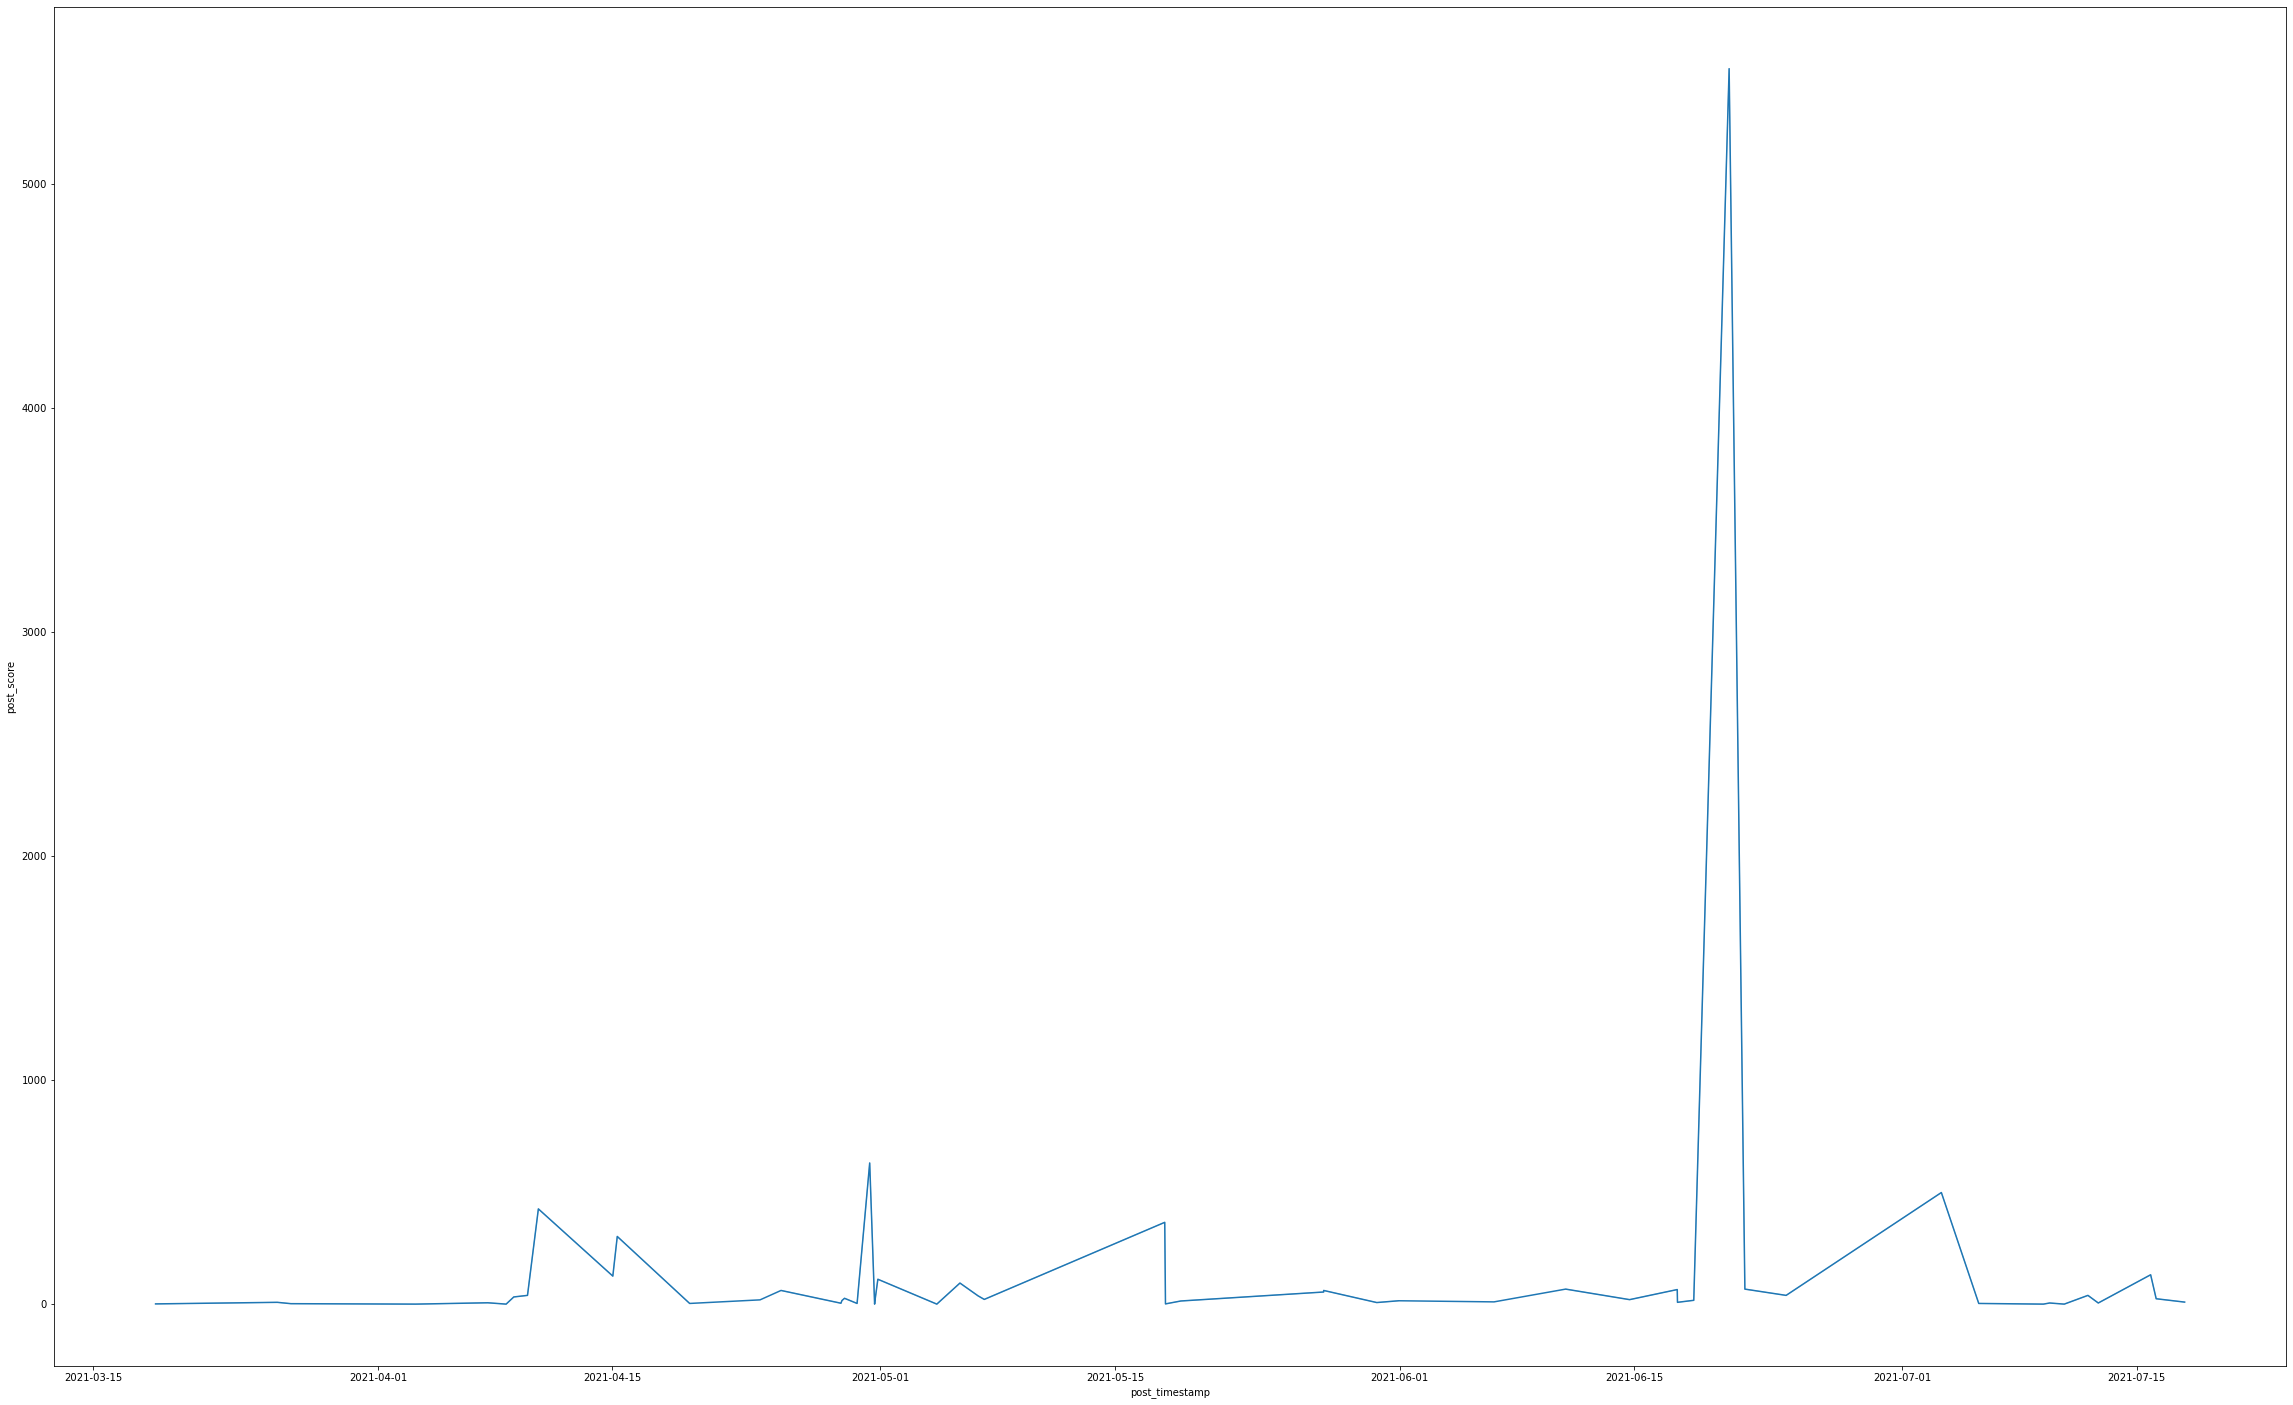

In [15]:
#post score over time

plt.figure(figsize=(40,25))
sns.lineplot(data=df, x="post_timestamp", y="post_score")

<AxesSubplot:xlabel='post_timestamp', ylabel='post_upvote_ratio'>

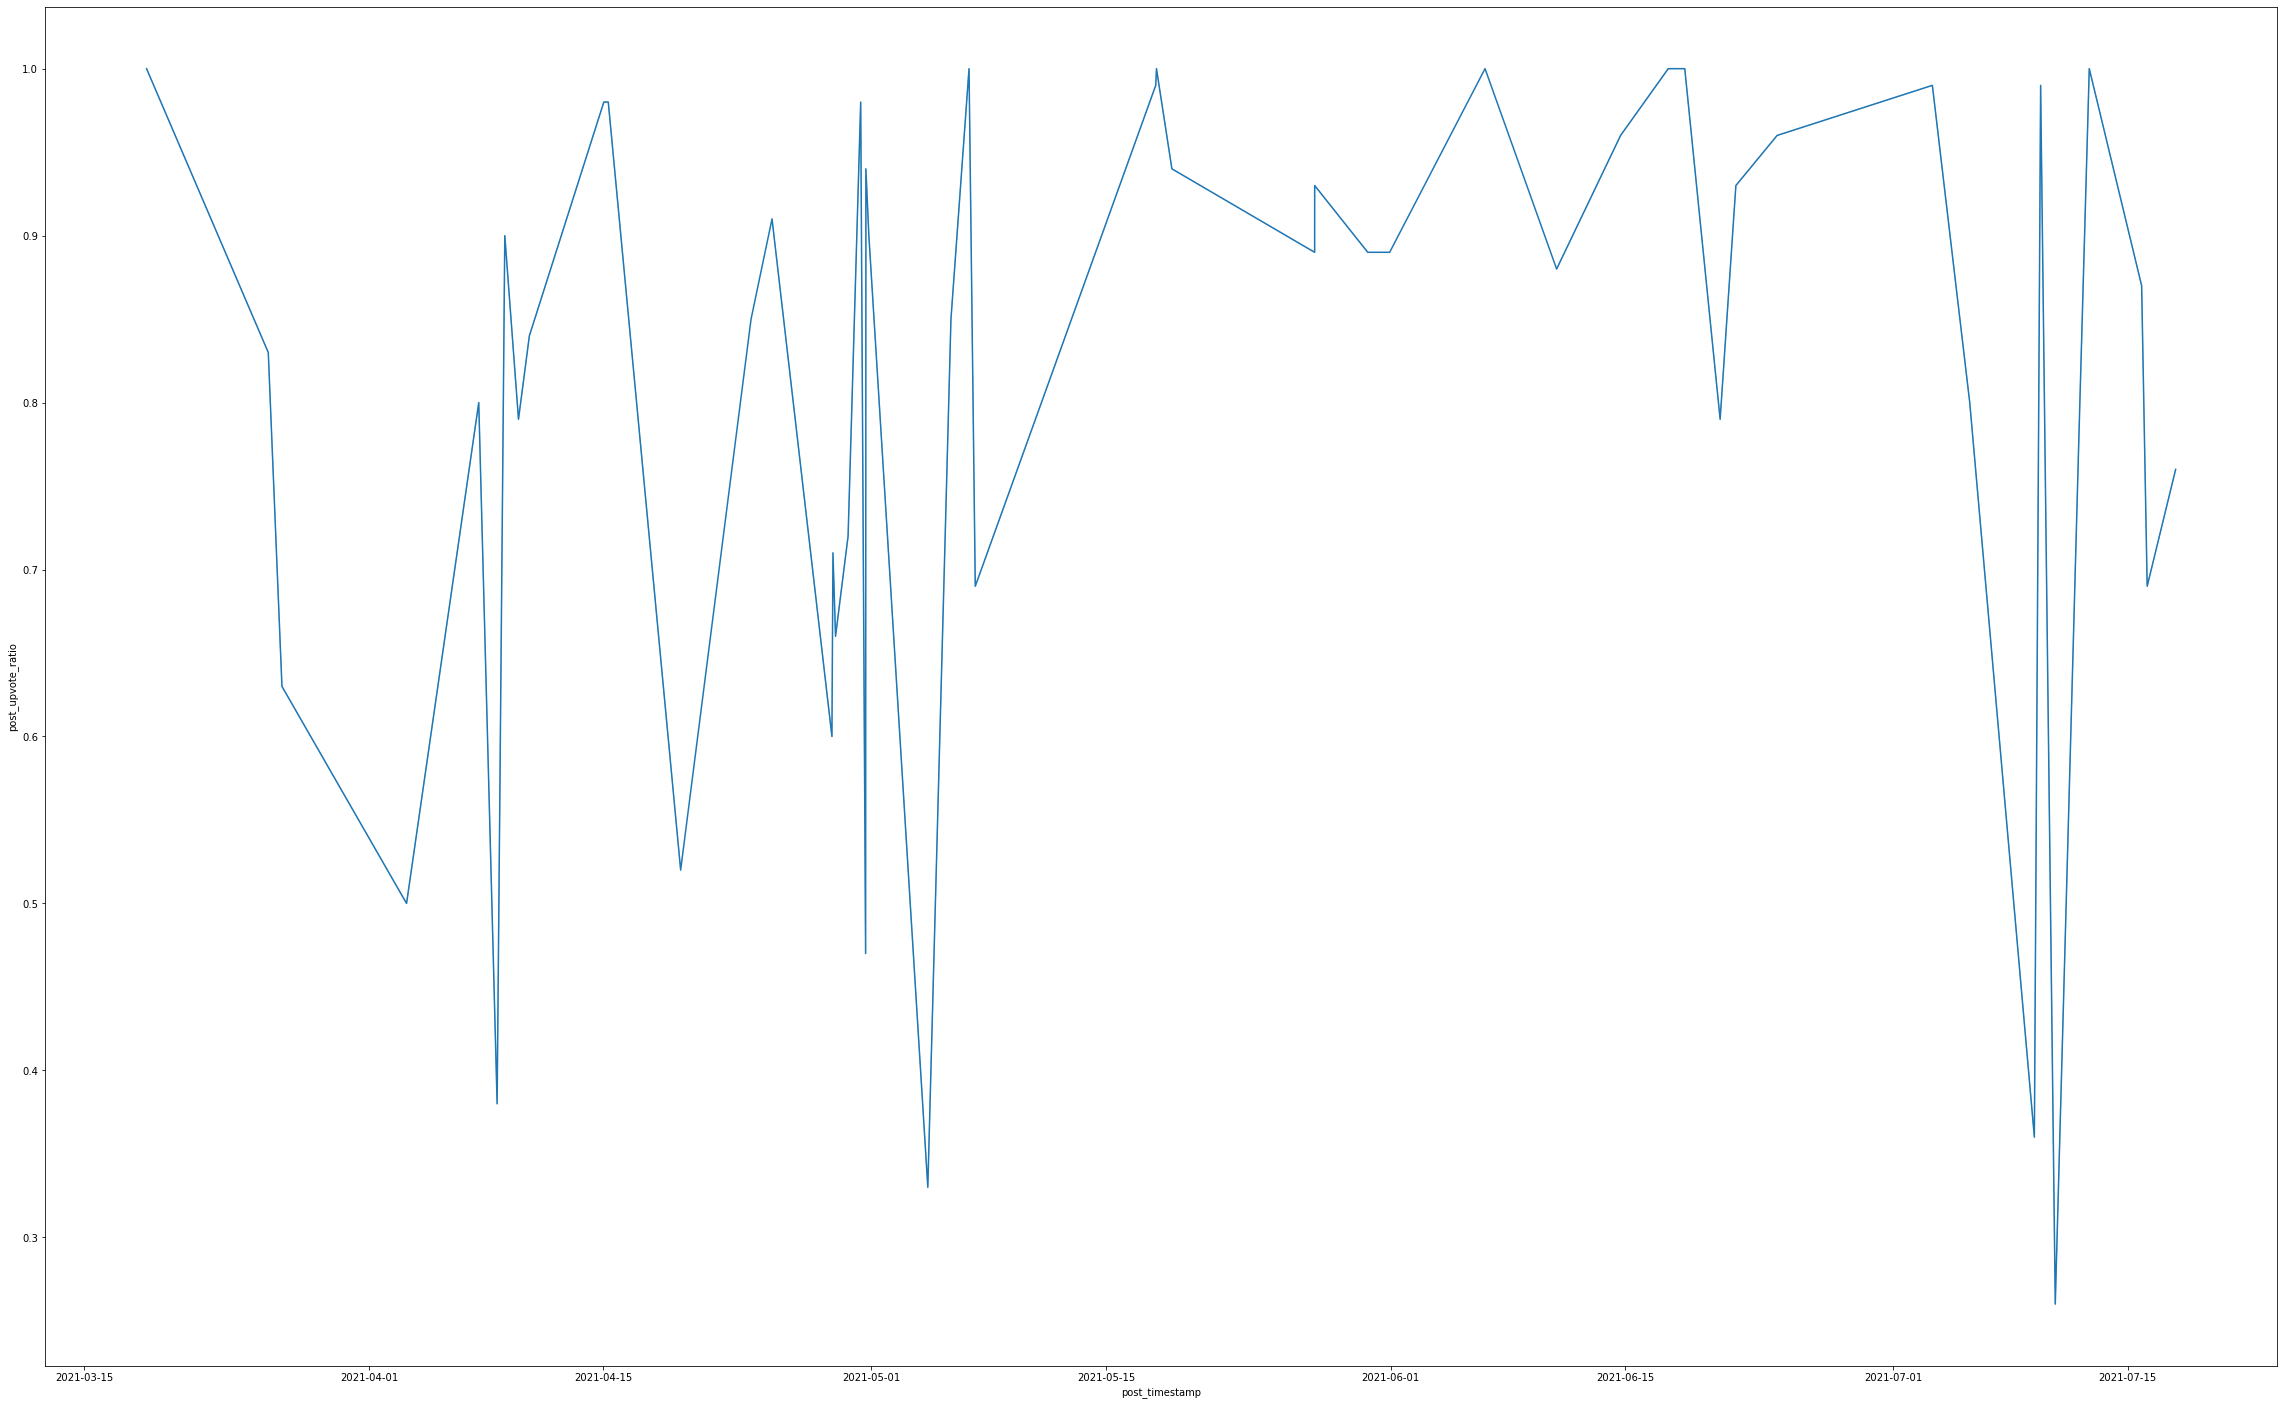

In [16]:
#post upvote ratio over time


plt.figure(figsize=(40,25))
sns.lineplot(data=df, x="post_timestamp", y="post_upvote_ratio")

<AxesSubplot:xlabel='post_timestamp', ylabel='comment_downs'>

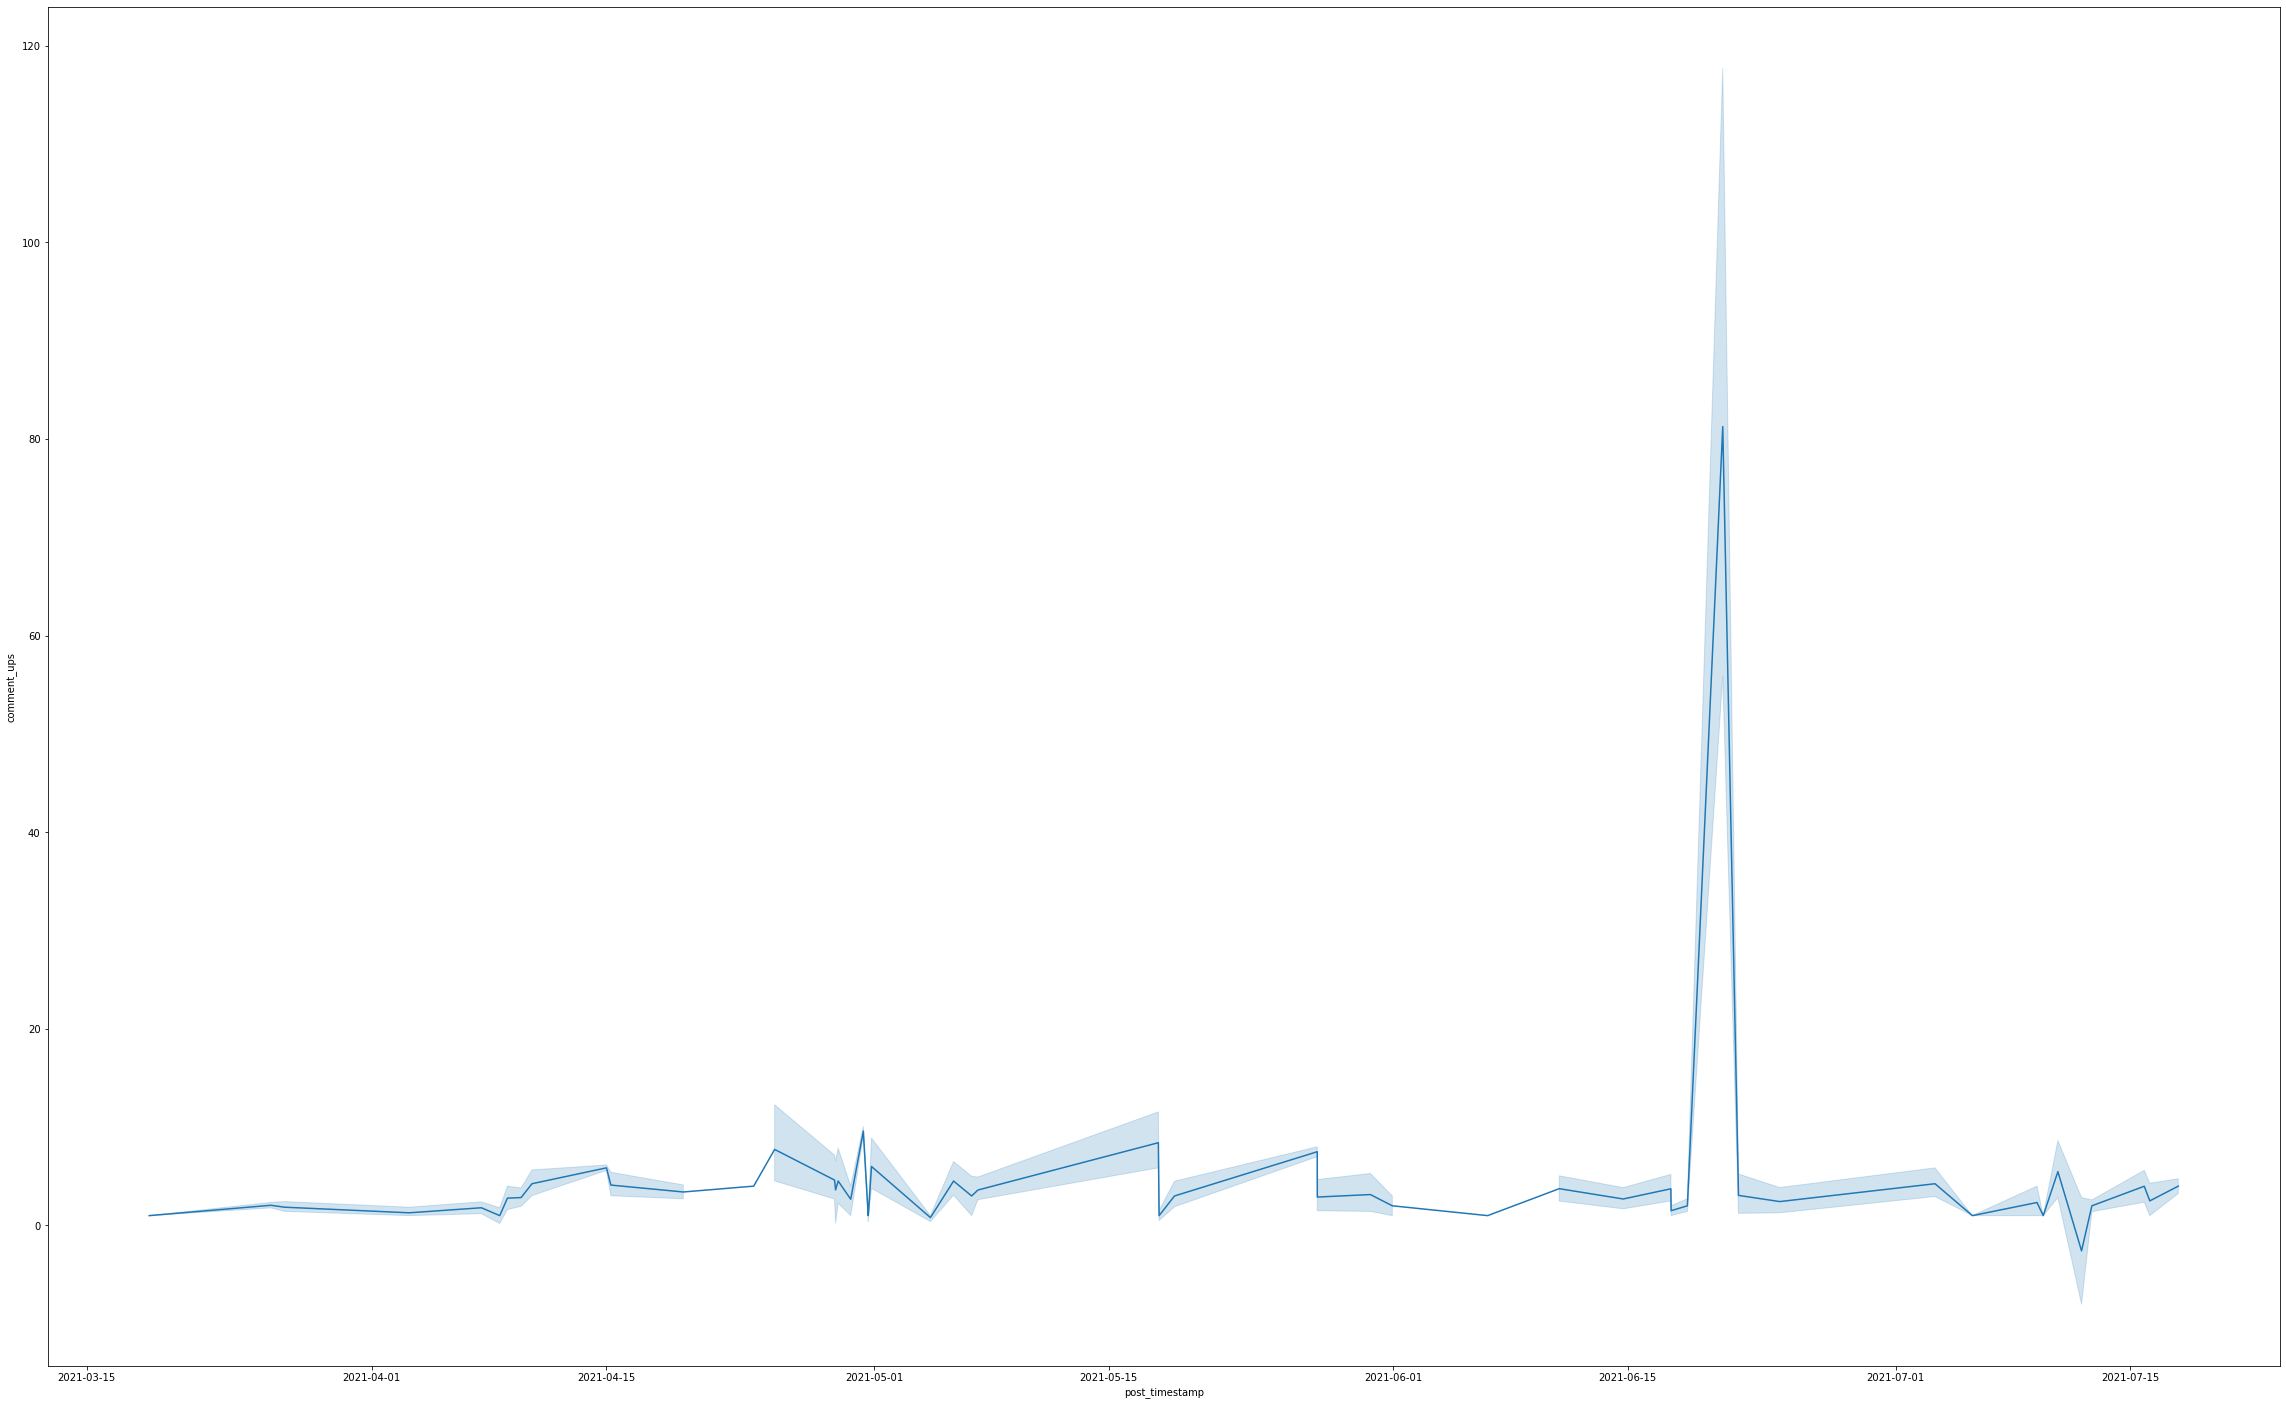

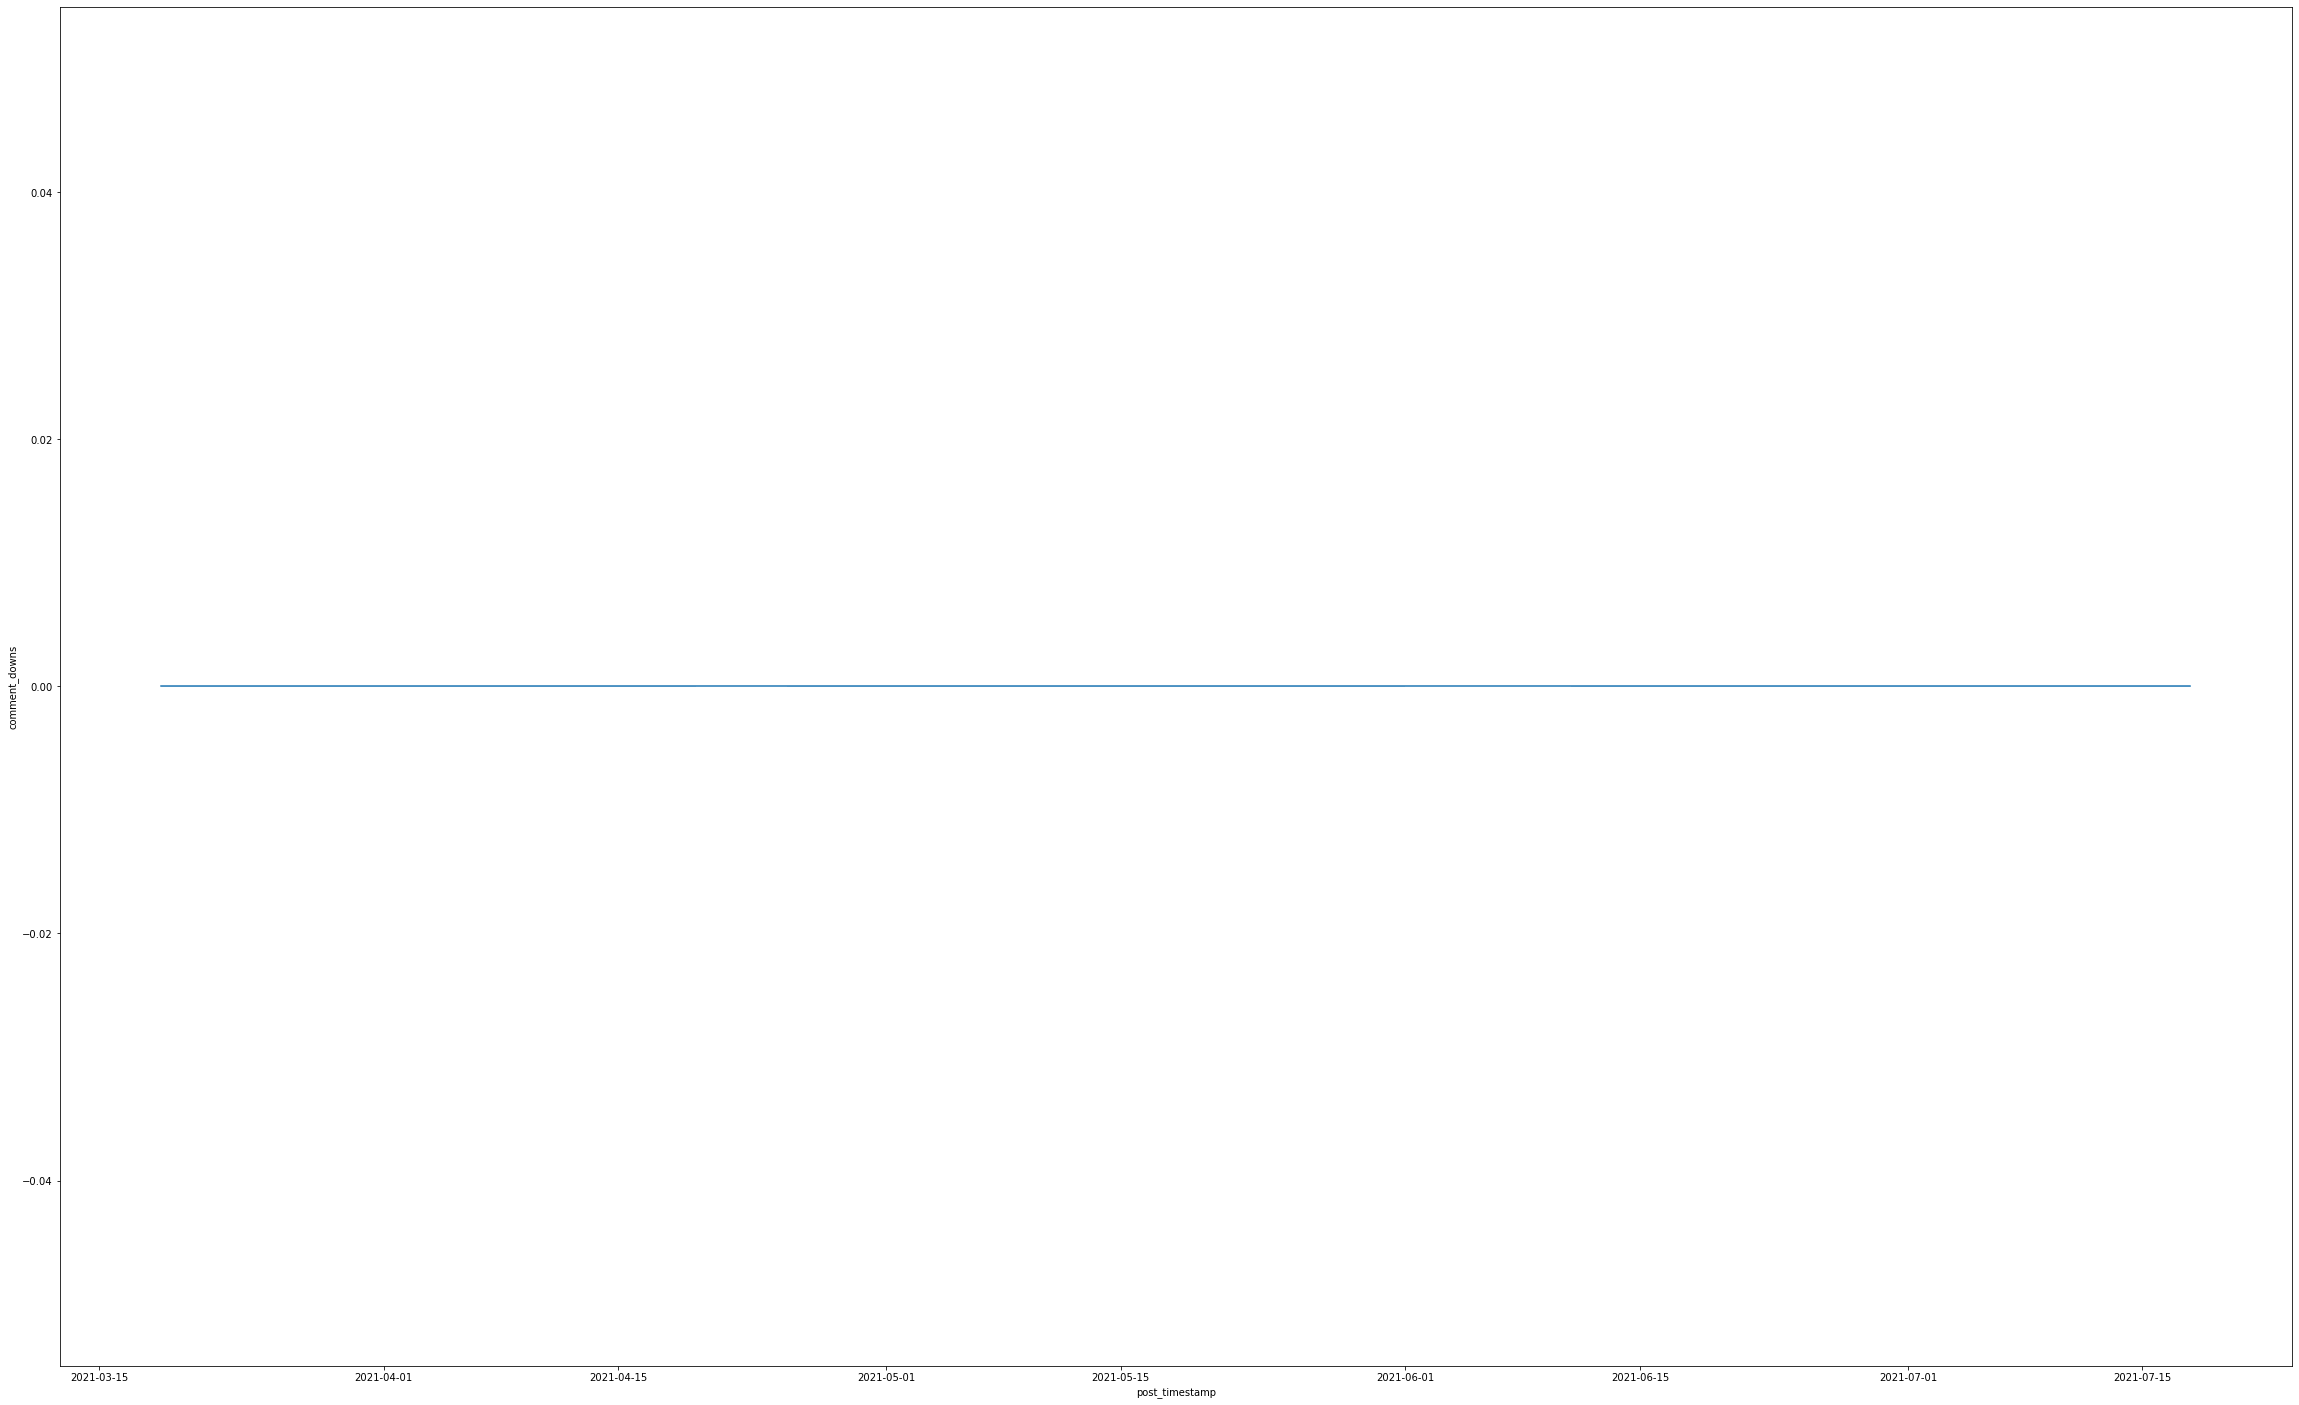

In [17]:
#post upvotes vs downvotes over time

plt.figure(figsize=(40,25))
sns.lineplot(x="post_timestamp", y="comment_ups", data=df)



plt.figure(figsize=(40,25))
sns.lineplot(x="post_timestamp", y="comment_downs", data=df)  #downvotes are not useful here as 
                                                                #theyre all zeros

In [248]:
#drop comment downs column 

df.drop(['comment_downs'], axis=1, inplace=True)

In [26]:
df.head()

,post_id,post_title,post_score,post_timestamp,post_upvote_ratio,post_selftext,comment_id,comment_body,comment_timestamp,comment_ups
12,omc9i2,Updated Covid numbers for McLennan County - co...,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan Count...,h5k1qxf,I really admire your tenacity and thank you fo...,2021-07-17 21:11:56,3
10,omc9i2,Updated Covid numbers for McLennan County - co...,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan Count...,h5k3wvt,Thank you,2021-07-17 21:30:38,4
11,omc9i2,Updated Covid numbers for McLennan County - co...,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan Count...,h5k27z2,Keep up the post. Don't let the anti-vax idiot...,2021-07-17 21:16:02,4
9,omc9i2,Updated Covid numbers for McLennan County - co...,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan Count...,h5k1xo5,I think the interesting thing here is the offi...,2021-07-17 21:13:33,5
105,ol8xoo,Update on Sjw-resistance: it is still trash. T...,24,2021-07-16 03:50:55,0.69,>[Biden's Angry Ramblings](https://www.deviant...,h5ger9p,Don’t apologize. That guy isn’t here posting i...,2021-07-16 23:10:01,1


In [110]:
#first make a copy of original df for nlp purposes

df2 = df.copy()
df2.head(2)

,post_id,post_title,post_score,post_timestamp,post_upvote_ratio,post_selftext,comment_id,comment_body,comment_timestamp,comment_ups
12,omc9i2,Updated Covid numbers for McLennan County - co...,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan Count...,h5k1qxf,I really admire your tenacity and thank you fo...,2021-07-17 21:11:56,3
10,omc9i2,Updated Covid numbers for McLennan County - co...,9,2021-07-17 20:38:33,0.76,Here are the latest numbers for McLennan Count...,h5k3wvt,Thank you,2021-07-17 21:30:38,4


In [249]:
df2=df2[['post_title', 'post_selftext', 'comment_body']]
df2.shape

(2817, 3)

In [262]:
#df3=df2[['post_selftext']]
#df3.head()
#df3.rename(columns = {'post_selftext':'corpus'}, inplace = True)
#df3.drop_duplicates(subset='corpus', keep="first", inplace=True)
#df3.shape
#df3.info()    #no nulls
#df3.head()

In [261]:
#df4=df2[['comment_body']]
#df4.rename(columns = {'comment_body':'corpus'}, inplace = True)
#df4.drop_duplicates(subset='corpus', keep="first", inplace=True)
#df4.shape
#df4.info()    #no nulls
#df4.head()

In [268]:
#df1=df2[['post_title']]
#df1.rename(columns = {'post_title':'corpus'}, inplace = True)
#df1.drop_duplicates(subset='corpus', keep="first", inplace=True)
#df1.shape
#df1.info()   #no nulls
#df1.head()

In [277]:
#creating a corpus by appending every textual column together into one column 



#df5=df1.append(df3)      #appending post_title to the bottom of post_selftext column   (5634 rows)
#df5.shape
#df5.head()
#df5.info()
#df6=df5.append(df4)                           #appending comment_body column to bottom of previous df
#df6.shape
#df6.info()
#df6.head() 
#df6.shape

df6.sample(15)



,corpus
1499,"Take care, keep a regular read on oxygen levels."
92,"Also I'm fully vacced bitch, I believe in science. I just don't put a sign in my yard telling people"
743,"Very good take my friend. \n\nFor me, the TLDR part is that to be able to have enjoyed playing HI3 and GI within the span of few years and still enjoying content from both, have truly been blissful."
402,Is the space pope not reptilian?
2267,"https://www.hindustantimes.com/india-news/oxygen-plants-under-pm-cares-to-be-installed-in-hospitals-as-covid-cases-surge-101618503831039.html\n\n> With daily new cases of the coronavirus disease (Covid-19) seeing a record high every day, the Unio..."
433,That won’t feed the power-hungry mods tho
1816,OP - I’ve gone through the same thoughts and what it came down to me is that I have to use the same logic I apply to the statistical likelihood of catching covid vs the statistical likelihood of the side affects of the vaccine - and latter is a s...
109,The only bias in an article like that is from an anti Vax person and people who are like that are just stupid cuz millions of people are vaccinated with no problems just go get it bro
785,"What do you mean, ""go underground""? \n \nI live in a country where ivermectin is not easily accessible, so I ordered some from a pharmacy in another country. Is that what you mean?"
1626,"Gennova is making an mRNA vaccine, hopefully will be available by Q4 : https://www.livemint.com/companies/news/gennovaseeks-to-start-trials-of-indigenous-mrnavaccine-11618766103234.html\n\nPfizer depends completely on when the govt. or pfizer bli..."


In [278]:
#calling our df "corpus"
corpus = df6
corpus.sample(15)

,corpus
2163,"Are hospitals allowing ICU admissions without covid report? My friends father needs an ICU but does not have a report, since the symptoms only started in the morning."
179,"Amazing! Thanks for such a thorough insight into the whole process, super helpful!"
2101,https://www.ndtv.com/world-news/lancet-study-sheds-light-on-10-scientific-reasons-why-coronavirus-is-airborne-2415028\n\nIt's in the air guys. We knew it earlier but now it's fully confirmed. I wonder how it spreads through the air and what one c...
1574,This is great news! and for the love of all things holy they should start a parallel trial of Novavax as a booster for AZ and Covaxin. By the time they hit the market in Sept (?) we should have some solid immunogenecity and safety results.
383,"> Get vaccinated, spay and neuter your pets\n\nMisunderstood, got neutered, vaccinated my pets."
2235,"Not sure if right place but if anyone has aviation contacts or is an aviation engineer who thinks this is doable and is worth escalating, please do so:\n\n[https://www.theengineer.co.uk/aircraft-hbot-hyperbaric-oxygen-chambers/](https://www.thee..."
1195,I have a LOT of masks I've made that I really want to pass along; does anyone know a charity or person I can send them to who can distribute them? I can pay to ship them out. I have a lot of child-size and adult-size masks with nose wires in them.
1379,"4k cases less in Delhi today compared to yesterday. How are cases nose-diving there? Observing this pattern since last year, Cases rise exponentially, Amit holds a meeting and within 3-4 days cases fall. \n\nAmit didn't even hold a meeting this t..."
766,"I have been following the story of the Ivermectin cover-up and the ruling class's propaganda campaign for five or six months. At this point I feel we need a brand-new word to describe the awfulness of what is transpiring. I propose ""homicidoctrin..."
1425,"Guys, my Mom(50) and Dad (53) both got their first dose of Covaxin on 7th April. Its been 35 days since their first dose now and Covaxin is being given to 18-44 in most of the centres. Its not available anywhere in Delhi for 45+ people. What am I..."


## Text Preprocessing 

In [296]:
#List of all english words in nltk
words = set(nltk.corpus.words.words())
len(words)

235892

In [279]:
def preprocessed_text(text):
    """
    This function makes text lowercase, remove punctuation, square brackets, and emojis
    """
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    #remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = profanity.censor(text)
    return text

In [280]:
# Corpus
cleaned_df = pd.DataFrame(corpus.corpus.apply(lambda x: preprocessed_text(x)))
cleaned_df.sample(10)

,corpus
1968,oh yes research papers are much longerbut i wasnt comparing them with research papers
465,yeah it really feels as though people just want to **** on people they think are beneath them for having hesitation that doesnt help people change their minds not to mention just having one dumb opinion doesnt make you an idiot i know very smart ...
188,this is the post i have searching for on this sub great help thank you heres a award
370,well looks like im the only member of the astrazeneca gang
1751,oh so this dance party is for the rich i see
599,i dont know id if im allowed to say it here but ill take a chance moderna films other teams practices
1815,you have tens of millions of people getting a vaccine with fairly small amount of immediate side effects everyone along their **** over the blood clots was an example of just how something as literally in slowed the shots being administered wh...
1118,notes and highlights of kentucky governor andy beshears live update may notes by umrtylerdurden and daily update teamwatch here youtube httpswwwyoutubecomgovandybeshear facebook httpswwwfacebookcomgovandybeshearheadlines cases deaths new c...
2181,is mh also hiding deaths like bjp ruled states are there any efforts to increase testing as currently tests are coming positive
154,i hereby insult you


In [281]:
pd.set_option("max_colwidth", 250)
cleaned_df.sample(10)

,corpus
600,johnson johnson player ready
1297,hospital should allow a family member to stay with patient for longer duration staffs are overworked and they will not take proper care of patienti feel many old people died due to this
1045,disowning antivax family
2309,developing an immunity does not mean presence of antibodies it means presence of bmemory cells which will be able to recognise the virus once it infects you and immediately produce specific antibodies to it in response antibodies disappear pretty...
1168,cest discutable si dans un cas prcis faire preuve de rserve scientifique mne une situation pire quelle aurait pu tre je pense quon devrait alors laisser tomber en partie la rserve scientifique
1251,what are the initial symptoms of covidi have body pain and chest pain since morning i took paracetamol to ease it and it did gave respite tomorrow i have also booked for rt pcr test as well did consult with the physician too i am just scared if ...
1586,ferns and petals
528,seth rollins
1567,army has already brought in retirement medical staff back on covid duty they could setup field hospitals too if government orders them to
1345,anyone knows anything about fluctuating oxygen levels mother is on oxygen bed and sending mesag like her oxygen is jumping like to to and doctors are puzzled as well apparentlyi am really **** scared right now


In [282]:
cleaned_df.shape

(2834, 1)

In [283]:
#Removing unecessary words by selectng for default "english" stopwords, and adding words 
#that might occur a lot in our corpus

extended_stopwords = ['covid', 'corona', 'virus', 'vaccine']

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(extended_stopwords)

### Document-Term Matrix using CountVectorizer 

In [284]:

cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['corpus'])

cv_dtm = pd.DataFrame(doc_word.toarray(), columns = cv.get_feature_names()).head(10)

In [285]:
cv_dtm

,aa,aaa,aaaah,aaah,aadhaar,aadhar,aadmi,aah,aaj,aam,aap,aarogya,aarpg,aasra,aatmanirbhar,aaya,aayog,ab,abandon,abandoned,abandonn,abc,abcs,abdicated,abdrakhmanov,...,zenith,zero,zerothe,zetian,zheng,zhengli,zhuan,ziggurat,ziggurats,zika,zinc,zip,zoe,zoes,zombie,zombiegal,zombies,zona,zone,zonein,zones,zoom,zoomies,zooms,zydus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Lots of sound effect words, lets lemmatize

### Lemmatization

In [286]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, MWETokenizer

wnl = WordNetLemmatizer()
word_tokenizer = lambda x: word_tokenize(x)
lemmatize = lambda x: " ".join([wnl.lemmatize(w) for w in x])

In [287]:
cleaned_df['lemmatized'] = cleaned_df['corpus'].apply(word_tokenizer).apply(lemmatize)
cleaned_df

,corpus,lemmatized
12,updated covid numbers for mclennan county continuing to go up,updated covid number for mclennan county continuing to go up
105,update on sjwresistance it is still trash thank you,update on sjwresistance it is still trash thank you
73,nih director most worried about missouris spread compared to any state,nih director most worried about missouri spread compared to any state
117,for those of you who want to get vaccinated but have anticovid vaxx parents,for those of you who want to get vaccinated but have anticovid vaxx parent
119,county covid numbers are out and theyre spiking as expected,county covid number are out and theyre spiking a expected
...,...,...
2793,secrets in daniel still havent finished that one ben meaning to,secret in daniel still havent finished that one ben meaning to
2794,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro its heart breaking,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro it heart breaking
2816,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit it definitely different from the perspective of most of those here in canada or in the u though we dont have that excuse up here
2771,click if youd like to be notified when this post is solvedtype in the message subject if it hasnt already been filled in user is currently subscribed to this post,click if youd like to be notified when this post is solvedtype in the message subject if it hasnt already been filled in user is currently subscribed to this post


In [288]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['lemmatized'])
pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

,aa,aaa,aaaah,aaah,aadhaar,aadhar,aadmi,aah,aaj,aam,aap,aarogya,aarpg,aasra,aatmanirbhar,aaya,aayog,ab,abandon,abandoned,abandonn,abc,abdicated,abdrakhmanov,abduction,...,zelensky,zelensly,zelniker,zeneca,zenith,zero,zerothe,zetian,zheng,zhengli,zhuan,ziggurat,zika,zinc,zip,zoe,zoes,zombie,zombiegal,zona,zone,zonein,zoom,zoomies,zydus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [209]:
#lemmatized about 2000 words, although sound effects still very much present, 
#as well as words in languages other than English 

### Stemming:

In [289]:
stemmer = PorterStemmer()
word_tokenizer = lambda x: word_tokenize(x)
stemify = lambda x: " ".join([stemmer.stem(w) for w in x])


In [290]:
cleaned_df["stemmed"] = cleaned_df['corpus'].apply(word_tokenizer).apply(stemify)
cleaned_df

,corpus,lemmatized,stemmed
12,updated covid numbers for mclennan county continuing to go up,updated covid number for mclennan county continuing to go up,updat covid number for mclennan counti continu to go up
105,update on sjwresistance it is still trash thank you,update on sjwresistance it is still trash thank you,updat on sjwresist it is still trash thank you
73,nih director most worried about missouris spread compared to any state,nih director most worried about missouri spread compared to any state,nih director most worri about missouri spread compar to ani state
117,for those of you who want to get vaccinated but have anticovid vaxx parents,for those of you who want to get vaccinated but have anticovid vaxx parent,for those of you who want to get vaccin but have anticovid vaxx parent
119,county covid numbers are out and theyre spiking as expected,county covid number are out and theyre spiking a expected,counti covid number are out and theyr spike as expect
...,...,...,...
2793,secrets in daniel still havent finished that one ben meaning to,secret in daniel still havent finished that one ben meaning to,secret in daniel still havent finish that one ben mean to
2794,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro its heart breaking,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro it heart breaking,im glad you did i didnt want to say it either i want to fellowship with the bodi but when they start sound like fox news or ben shapiro it heart break
2816,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit it definitely different from the perspective of most of those here in canada or in the u though we dont have that excuse up here,that fair enough and honestli i can understand your perspect and sympath with you want to wait a bit it definit differ from the perspect of most of those here in canada or in the us though we dont have that excus up here
2771,click if youd like to be notified when this post is solvedtype in the message subject if it hasnt already been filled in user is currently subscribed to this post,click if youd like to be notified when this post is solvedtype in the message subject if it hasnt already been filled in user is currently subscribed to this post,click if youd like to be notifi when thi post is solvedtyp in the messag subject if it hasnt alreadi been fill in user is current subscrib to thi post


In [295]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['stemmed'])
pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

,aa,aaa,aaaah,aaah,aadhaar,aadhar,aadmi,aah,aaj,aam,aap,aarogya,aarpg,aasra,aatmanirbhar,aaya,aayog,ab,abandon,abandonn,abc,abdic,abdrakhmanov,abduct,abhigyan,...,zelda,zelenski,zelensli,zelnik,zeneca,zenith,zero,zeroth,zetian,zheng,zhengli,zhuan,ziggurat,zika,zinc,zip,zoe,zombi,zombieg,zona,zone,zonein,zoom,zoomi,zydu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#got rid of about 3000 words, but still has foreign languages present. Lets remove those:

### Deleting non-English words 

In [297]:
del_non_eng = lambda x: " ".join(w for w in nltk.word_tokenize(x) if w in words )
cleaned_df['nltk'] = cleaned_df['corpus'].apply(del_non_eng)

In [298]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['nltk'])
pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

,aa,aam,abandon,abandoned,abduction,ability,abject,able,aboard,abolish,abomination,aborted,abortion,abracadabra,abroad,absence,absent,absentee,absolute,absolutely,abstain,absurd,absurdity,abundance,abundant,...,yep,yes,yeso,yesterday,yet,yield,yo,yogi,york,yorker,youd,young,younger,youve,yr,zebra,zee,zenith,zero,ziggurat,zinc,zip,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Still a few words that appear unstemmed, we can try spacy at this point

In [306]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [308]:
#example words to test
doc = nlp("abandon,abandoned, absence, absent, absentee, absolute, absolutely, absurd, absurdity, abundance, abundant, yep, yes, yeso, yo, youd, youve, zee")
" ".join([token.lemma_ for token in doc])


'abandon , abandon , absence , absent , absentee , absolute , absolutely , absurd , absurdity , abundance , abundant , yep , yes , yeso , yo , you d , you ve , zee'

In [309]:
spacy_lemmatize = lambda x: " ".join([token.lemma_ for token in nlp(x)])

In [310]:
cleaned_df['spacy'] = cleaned_df['corpus'].apply(spacy_lemmatize)
cleaned_df

,corpus,lemmatized,stemmed,nltk,spacy
12,updated covid numbers for mclennan county continuing to go up,updated covid number for mclennan county continuing to go up,updat covid number for mclennan counti continu to go up,covid for county to go up,update covid number for mclennan county continue to go up
105,update on sjwresistance it is still trash thank you,update on sjwresistance it is still trash thank you,updat on sjwresist it is still trash thank you,update on it is still trash thank you,update on sjwresistance it be still trash thank you
73,nih director most worried about missouris spread compared to any state,nih director most worried about missouri spread compared to any state,nih director most worri about missouri spread compar to ani state,director most worried about spread to any state,nih director most worried about missouris spread compare to any state
117,for those of you who want to get vaccinated but have anticovid vaxx parents,for those of you who want to get vaccinated but have anticovid vaxx parent,for those of you who want to get vaccin but have anticovid vaxx parent,for those of you who want to get but have,for those of you who want to get vaccinated but have anticovid vaxx parent
119,county covid numbers are out and theyre spiking as expected,county covid number are out and theyre spiking a expected,counti covid number are out and theyr spike as expect,county covid are out and theyre spiking as,county covid number be out and they re spike as expect
...,...,...,...,...,...
2793,secrets in daniel still havent finished that one ben meaning to,secret in daniel still havent finished that one ben meaning to,secret in daniel still havent finish that one ben mean to,in still havent finished that one ben meaning to,secret in daniel still have nt finish that one ben mean to
2794,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro its heart breaking,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro it heart breaking,im glad you did i didnt want to say it either i want to fellowship with the bodi but when they start sound like fox news or ben shapiro it heart break,glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben its heart breaking,I m glad you do I do nt want to say it either I want to fellowship with the body but when they start sound like fox news or ben shapiro its heart break
2816,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit it definitely different from the perspective of most of those here in canada or in the u though we dont have that excuse up here,that fair enough and honestli i can understand your perspect and sympath with you want to wait a bit it definit differ from the perspect of most of those here in canada or in the us though we dont have that excus up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,that s fair enough and honestly I can understand your perspective and sympathize with you want to wait a bit its definitely different from the perspective of most of those here in canada or in the we though we do nt have that excuse up here
2771,click if youd like to be notified when this post is solvedtype in the message subject if it hasnt already been filled in user is currently subscribed to this post,click if youd like to be notified when this post is sol

In [311]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['spacy'])
pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

,aa,aaa,aaaah,aaah,aadhaar,aadhar,aadmi,aah,aaj,aam,aap,aarogya,aarpg,aasra,aatmanirbhar,aaya,aayog,ab,abandon,abandonn,abc,abcs,abdicate,abdrakhmanov,abduction,...,zelensky,zelensly,zelniker,zeneca,zenith,zero,zerothe,zetian,zheng,zhengli,zhuan,ziggurat,zika,zinc,zip,zoe,zombie,zombiegal,zona,zone,zonein,zoom,zoomie,zydu,zydus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [312]:
#not good, sound effects and foreign languages are back.
#Lets try a combination of nltk and spacy lemmatization

In [313]:
cleaned_df['clean'] = cleaned_df['nltk'].apply(spacy_lemmatize)
cleaned_df

,corpus,lemmatized,stemmed,nltk,spacy,clean
12,updated covid numbers for mclennan county continuing to go up,updated covid number for mclennan county continuing to go up,updat covid number for mclennan counti continu to go up,covid for county to go up,update covid number for mclennan county continue to go up,covid for county to go up
105,update on sjwresistance it is still trash thank you,update on sjwresistance it is still trash thank you,updat on sjwresist it is still trash thank you,update on it is still trash thank you,update on sjwresistance it be still trash thank you,update on it be still trash thank you
73,nih director most worried about missouris spread compared to any state,nih director most worried about missouri spread compared to any state,nih director most worri about missouri spread compar to ani state,director most worried about spread to any state,nih director most worried about missouris spread compare to any state,director most worried about spread to any state
117,for those of you who want to get vaccinated but have anticovid vaxx parents,for those of you who want to get vaccinated but have anticovid vaxx parent,for those of you who want to get vaccin but have anticovid vaxx parent,for those of you who want to get but have,for those of you who want to get vaccinated but have anticovid vaxx parent,for those of you who want to get but have
119,county covid numbers are out and theyre spiking as expected,county covid number are out and theyre spiking a expected,counti covid number are out and theyr spike as expect,county covid are out and theyre spiking as,county covid number be out and they re spike as expect,county covid be out and they re spike as
...,...,...,...,...,...,...
2793,secrets in daniel still havent finished that one ben meaning to,secret in daniel still havent finished that one ben meaning to,secret in daniel still havent finish that one ben mean to,in still havent finished that one ben meaning to,secret in daniel still have nt finish that one ben mean to,in still have nt finish that one ben mean to
2794,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro its heart breaking,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro it heart breaking,im glad you did i didnt want to say it either i want to fellowship with the bodi but when they start sound like fox news or ben shapiro it heart break,glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben its heart breaking,I m glad you do I do nt want to say it either I want to fellowship with the body but when they start sound like fox news or ben shapiro its heart break,glad you do I do nt want to say it either I want to fellowship with the body but when they start sound like fox news or ben its heart break
2816,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit it definitely different from the perspective of most of those here in canada or in the u though we dont have that excuse up here,that fair enough and honestli i can understand your perspect and sympath with you want to wait a bit it definit differ from the perspect of most of those here in canada or in the us though we dont have that excus up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,that s fair enough and honestly I can understand your perspective and symp

In [314]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['clean'])
pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

,aa,aam,abandon,abduction,ability,abject,able,aboard,abolish,abomination,abort,aborted,abortion,abracadabra,abroad,absence,absent,absentee,absolute,absolutely,abstain,absurd,absurdity,abundance,abundant,...,yeast,yell,yellow,yep,yes,yeso,yesterday,yet,yield,yo,yogi,york,yorker,young,yr,zebra,zee,zenith,zero,ziggurat,zinc,zip,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [316]:
#minimal difference from just nltk alone, but that's ok. 
#dropping redundant columns:

cleaned_df = cleaned_df.drop(columns=['lemmatized','stemmed','spacy'])
cleaned_df

,corpus,nltk,clean
12,updated covid numbers for mclennan county continuing to go up,covid for county to go up,covid for county to go up
105,update on sjwresistance it is still trash thank you,update on it is still trash thank you,update on it be still trash thank you
73,nih director most worried about missouris spread compared to any state,director most worried about spread to any state,director most worried about spread to any state
117,for those of you who want to get vaccinated but have anticovid vaxx parents,for those of you who want to get but have,for those of you who want to get but have
119,county covid numbers are out and theyre spiking as expected,county covid are out and theyre spiking as,county covid be out and they re spike as
...,...,...,...
2793,secrets in daniel still havent finished that one ben meaning to,in still havent finished that one ben meaning to,in still have nt finish that one ben mean to
2794,im glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben shapiro its heart breaking,glad you did i didnt want to say it either i want to fellowship with the body but when they start sounding like fox news or ben its heart breaking,glad you do I do nt want to say it either I want to fellowship with the body but when they start sound like fox news or ben its heart break
2816,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,thats fair enough and honestly i can understand your perspective and sympathize with you wanting to wait a bit its definitely different from the perspective of most of those here in canada or in the us though we dont have that excuse up here,that s fair enough and honestly I can understand your perspective and sympathize with you want to wait a bit its definitely different from the perspective of most of those here in canada or in the we though we do nt have that excuse up here
2771,click if youd like to be notified when this post is solvedtype in the message subject if it hasnt already been filled in user is currently subscribed to this post,click if youd like to be notified when this post is in the message subject if it already been filled in user is currently to this post,click if you d like to be notify when this post be in the message subject if it already be fill in user be currently to this post


### Topic Modelling

In [318]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    This function will display the highest weighted words for our topics
    """
    for x, topic in enumerate(model.components_):
        if not topic_names or not topic_names[x]:
            print("\nTopic ", x)
        else:
            print("\nTopic: '", topic_names[x], "'")
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF

In [321]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['clean'])
clean_feat= pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

In [322]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(clean_feat)

display_topics(nmf_model, cv.get_feature_names(), 10)

/Users/aimanchughtai/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
get, people, go, well, good, work, make, even, time, see

Topic  1
game, nt, make, sec, think, story, mobile, take, people, get

Topic  2
source, know, would, say, one, see, safety, people, might, find

Topic  3
trump, nt, also, post, make, policy, first, even, russia, one

Topic  4
feed, world, new, one, life, fiction, science, nt, find, game

Topic  5
ben, phone, might, time, one, new, though, know, press, contact

Topic  6
get, time, excavator, nt, job, like, work, want, make, order

Topic  7
trigonal, know, language, code, one, great, nt, society, ie, world


In [326]:
#going to need to extend our stop list slightly to include nt, ie, get etc


newstops = ['would','get','go','make','even','see','nt','sec','take','know','say','one','see','might','also','first','new','ben','though','know','time','like','want','great','ie', 'able', 'well', 'little', 'many', 'think', 'two', 'try', 'become', 'next', 'today', 'really', 'bit', 'give', 'could']
stopwords.extend(newstops)

In [327]:
cv = CountVectorizer(stop_words=stopwords)
doc_word = cv.fit_transform(cleaned_df['clean'])
clean_feat = pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())

In [328]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(clean_feat)

display_topics(nmf_model, cv.get_feature_names(), 10)

/Users/aimanchughtai/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
people, good, work, number, program, need, university, talk, start, year

Topic  1
game, story, mobile, people, quality, love, high, long, technology, company

Topic  2
trump, post, policy, russia, send, war, evidence, prove, need, come

Topic  3
feed, world, life, fiction, science, find, game, synopsis, way, high

Topic  4
source, safety, people, find, adverse, issue, study, ask, reader, effect

Topic  5
phone, press, contact, screen, wear, voice, number, something, long, music

Topic  6
excavator, job, work, order, operator, read, fill, come, right, doll

Topic  7
trigonal, language, code, society, world, mind, message, key, people, variant


In [ ]:
#not the most coherent topics but will continue topic modeling with tfidf.
#Will also try LSA with tfidf
#LDA
#Eventually sentiment analysis if time allows